In [64]:
# importing required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import cross_val_predict
from sklearn.externals import joblib
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

In [65]:
# importing or loading the dataset 
dataset = pd.read_csv('oer/data/oer100.csv') 
#testset = pd.read_excel('test_oer.xlsx')
print(dataset.columns[0:28])
dataset.tail()
#print(testset.columns[0:28])

Index(['Name', 'd1', 'd2', 'd3', 'd4', '2+', 'Tele', 'Mele', 'rele', 'Vm',
       'rVm', 'RvdW', 'rvdw', 'Rion', 'rion', 'EFirIon', 'ktherm', 'Eaffi',
       'qsum', 'chargeM', 'averagecharge', 'EQ', 'TL', 'L', 'Tar',
       'OverPotential'],
      dtype='object')


,Name,d1,d2,d3,d4,2+,Tele,Mele,rele,Vm,...,ktherm,Eaffi,qsum,chargeM,averagecharge,EQ,TL,L,Tar,OverPotential
95,Cr2+,1.94321,1.94296,1.91647,1.91624,2,13.376,1.66,11.514213,7.23,...,94.0,64.3,0.788781,1.491588,0.157756,-0.545648,7.718880,1.929720,3.142720,-1.912720
96,Cu2+,1.94625,1.94614,1.91951,1.91936,7,13.376,1.90,13.157810,7.11,...,400.0,118.4,-0.566408,0.006530,-0.113282,-0.001940,7.730000,1.932811,0.671823,-0.841696
97,V4+,2.07497,2.06708,2.01582,2.02080,1,17.504,1.63,10.677586,8.32,...,30.7,50.6,-0.215920,0.720255,-0.036000,-0.399885,9.762532,1.952506,2.998095,-1.768095
98,Zn2+,2.03973,2.03973,1.94628,1.94628,8,13.376,1.65,11.103636,9.16,...,116.0,0.0,-0.480002,0.318775,-0.096000,-0.130118,7.972025,1.993006,1.041606,-1.087802
99,Mn2+,1.92774,1.92774,1.92300,1.92299,3,13.376,1.55,10.769453,7.35,...,7.8,0.0,0.609038,1.491384,0.121808,-0.683730,7.701467,1.925367,2.183315,-0.953315


In [66]:

#data=pd.DataFrame({
#
#    '2+':dataset.iloc[:, 1].values,
#    '0+':dataset.iloc[:, 2].values,
#    '1+':dataset.iloc[:, 3].values, 
#    '3+':dataset.iloc[:, 4].values,
#    'Mn+':dataset.iloc[:, 5].values,
#    'Ncor':dataset.iloc[:, 6].values,
#
#    'Nele':dataset.iloc[:, 7].values,
#    'Ocor':dataset.iloc[:, 8].values,
#    'Oele':dataset.iloc[:, 9].values, 
#    'Clcor':dataset.iloc[:, 10].values,
#    'Clele':dataset.iloc[:, 11].values,
#    'Mn+eled':dataset.iloc[:, 12].values,
#    
#    'Mele':dataset.iloc[:, 13].values,
#    'Ncoele':dataset.iloc[:, 16].values,
#    'Ocoele':dataset.iloc[:, 17].values,
#    'Clcoele':dataset.iloc[:, 18].values,
#    'Tele':dataset.iloc[:, 19].values,
#    'Tar':dataset.iloc[:, 14].values,
#    'OverPotential':dataset.iloc[:, 15].values,
#
#})
#data.tail()

In [67]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=dataset.iloc[:,1:24]  # Features
y=dataset[ 'Tar']  # Labels
print(X.columns)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) # 70% training and 30% test

Index(['d1', 'd2', 'd3', 'd4', '2+', 'Tele', 'Mele', 'rele', 'Vm', 'rVm',
       'RvdW', 'rvdw', 'Rion', 'rion', 'EFirIon', 'ktherm', 'Eaffi', 'qsum',
       'chargeM', 'averagecharge', 'EQ', 'TL', 'L'],
      dtype='object')


In [68]:
namelist=[None]*24
i=1
for index in X.columns :
    if index=='qsum':
        namelist[i]='q$_{sum}$'
    elif index=='d1':
        namelist[i]='d$_1$'
    elif index=='d2':
        namelist[i]='d$_2$'
    elif index=='d3':
        namelist[i]='d$_3$'
    elif index=='d4':
        namelist[i]='d$_4$'
    elif index=='L':
        namelist[i]='L'
    elif index=='TL':
        namelist[i]= 'T$_{len}$'
    elif index=='rele':
        namelist[i]='r$_{ele}$'
    elif index=='EQ':
        namelist[i]= 'E$_{Q}$'
    elif index=='Eaffi':
        namelist[i]='E$_{affi}$'
    elif index=='chargeM':
        namelist[i]='q$_M$'
    elif index== 'rvdw':
        namelist[i]='r$_{vdW}$'
    elif index=='RvdW':
        namelist[i]='R$_{vdW}$'
    elif index=='Vm':
        namelist[i]='V$_m$'
    elif index== 'EFirIon':
        namelist[i]='E$_{FirIon}$' 
    elif index=='rion':
        namelist[i]='r$_{ion}$'
    elif index=='Rion':
        namelist[i]='R$_{ion}$'
    elif index=='ktherm':
        namelist[i]= 'k$_{therm}$'
    elif index=='Mele':
        namelist[i]='M$_{ele}$'
    elif index=='rVm':
        namelist[i]='r$_{m}$'  
    elif index=='2+':
        namelist[i]='2$^+$'
    elif index=='Tele':
        namelist[i]='T$_{ele}$'
    elif index=='averagecharge':
        namelist[i]='q$_{ave}$'
    i=i+1
        

In [69]:
cor_matrix = X.corr()

In [70]:
def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    
    plotdata = cor_matrix
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 +4, 4),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(plotdata, cmap=cmap, rasterized=True, vmin=-1, vmax=1)
        fig.colorbar(psm, ax=ax)
        
    #plt.subplots.yticklabels(fontdict={ 'size'   : 7})
    plt.gca().set_xticks(np.linspace(0,23,24))
    plt.gca().set_yticks(np.linspace(0,23,24))    
    plt.gca().set_xticklabels(namelist,fontproperties = 'Arial')
    plt.xticks(rotation=90)
    plt.gca().set_yticklabels(namelist,fontproperties = 'Arial')
    #plt.yticks(rotation=5) 
    plt.savefig('oer/output/23_heatmap.tif',dpi=600)
    plt.show()

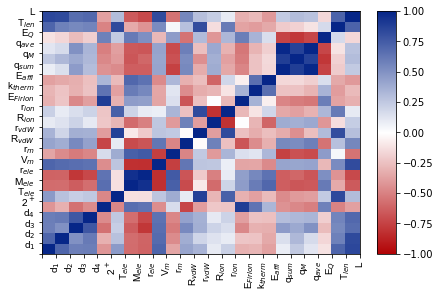

In [71]:
N = 256
vals = np.ones((N, 4))
vals1 = np.ones((N, 4))
vals[:, 0] = np.linspace(178/256, 1, N)
vals[:, 1] = np.linspace(2/256, 1, N)
vals[:, 2] = np.linspace(4/256, 1, N)
vals1[:, 0] = np.linspace(1 ,6/256, N)
vals1[:, 1] = np.linspace(1,38/256,  N)
vals1[:, 2] = np.linspace(1,137/256,  N)




newcolors = np.vstack((vals,
                       vals1))
newcmp = ListedColormap(newcolors, name='OrangeBlue')
plot_examples([newcmp])

In [72]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_form= sc.fit_transform(X)  
X_train_form = sc.fit_transform(X_train) 


RF with full trees,  MSE: 0.0008584627522816829 


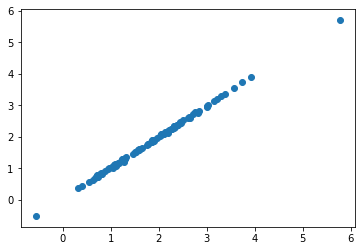

In [73]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

from sklearn.metrics import mean_squared_error 

#GBR = GradientBoostingRegressor(n_estimators=2000,random_state =50)
gbr = GBR(n_estimators= 200,random_state =50)
gbr.fit(X_form, y)
y_predicted = gbr.predict(X_form)

mse = mean_squared_error(y, y_predicted)
plt.scatter(y,y_predicted)
print("RF with full trees,  MSE: {} ".format(mse))

In [74]:
gbr.fit(X_form, y)
feature_imp = pd.Series(gbr.feature_importances_,index=X.columns[0:25]).sort_values(ascending=False)

feature_imp


averagecharge    0.268054
d3               0.129739
chargeM          0.093199
rele             0.092152
qsum             0.079985
d2               0.072653
Eaffi            0.063993
EQ               0.043555
L                0.027913
d4               0.026123
rion             0.020565
d1               0.015182
TL               0.013037
Vm               0.012036
rvdw             0.011682
Rion             0.007037
ktherm           0.005397
rVm              0.004958
RvdW             0.004287
Mele             0.003577
Tele             0.003492
2+               0.001380
EFirIon          0.000005
dtype: float64

In [75]:
namelist=[None]*24
i=0
for index in feature_imp.index :
    if index=='qsum':
        namelist[i]='q$_{sum}$'
    elif index=='d1':
        namelist[i]='d$_1$'
    elif index=='d2':
        namelist[i]='d$_2$'
    elif index=='d3':
        namelist[i]='d$_3$'
    elif index=='d4':
        namelist[i]='d$_4$'
    elif index=='L':
        namelist[i]='L'
    elif index=='TL':
        namelist[i]= 'T$_{len}$'
    elif index=='rele':
        namelist[i]='r$_{ele}$'
    elif index=='EQ':
        namelist[i]= 'E$_{Q}$'
    elif index=='Eaffi':
        namelist[i]='E$_{affi}$'
    elif index=='chargeM':
        namelist[i]='q$_M$'
    elif index== 'rvdw':
        namelist[i]='r$_{vdW}$'
    elif index=='RvdW':
        namelist[i]='R$_{vdW}$'
    elif index=='Vm':
        namelist[i]='V$_m$'
    elif index== 'EFirIon':
        namelist[i]='E$_{FirIon}$' 
    elif index=='rion':
        namelist[i]='r$_{ion}$'
    elif index=='Rion':
        namelist[i]='R$_{ion}$'
    elif index=='ktherm':
        namelist[i]= 'k$_{therm}$'
    elif index=='Mele':
        namelist[i]='M$_{ele}$'
    elif index=='rVm':
        namelist[i]='r$_{m}$'  
    elif index=='2+':
        namelist[i]='2$^+$'
    elif index=='Tele':
        namelist[i]='T$_{ele}$'
    elif index=='averagecharge':
        namelist[i]='q$_{ave}$'
    i=i+1
        

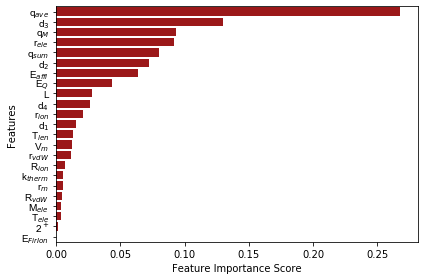

In [76]:

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index,color=(178/256.0,2/256.0,4/256.0))
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.gca().set_yticks(np.linspace(0,22,23))    
plt.gca().set_yticklabels(namelist[0:23],fontproperties = 'Arial')


#plt.title("Visualizing Important Features")
plt.tight_layout()
plt.savefig('oer/output/23_featureImpor',dpi=600)
plt.show()

In [82]:
X=dataset[ [  'averagecharge','d3','chargeM','rele','qsum','d2','Eaffi','EQ', 'L' ,'d4','rion', 'd1'#'EQ' ,'TL', 'rvdw','rele','rion','rVm', 'Eaffi','Tele','ktherm'
            ]]

#X=dataset.iloc[:,1:21]  # Features
y=dataset[ 'Tar'] # Features
sc = StandardScaler() 
  
X_form = sc.fit_transform(X) 


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_form, y, test_size=0.20) # 70% training and 30% test

In [83]:
gbr.fit(X_form, y)
feature_imp = pd.Series(gbr.feature_importances_,index=X.columns[0:25]).sort_values(ascending=False)
feature_imp

averagecharge    0.226153
d3               0.134425
qsum             0.128782
rele             0.098347
d2               0.081912
Eaffi            0.080554
chargeM          0.072995
EQ               0.059307
d4               0.040534
L                0.039792
rion             0.021084
d1               0.016116
dtype: float64

In [84]:
cor_matrix = X.corr()
print(cor_matrix)

               averagecharge        d3   chargeM      rele      qsum  \
averagecharge       1.000000  0.506366  0.870003 -0.664527  0.989797   
d3                  0.506366  1.000000  0.395303 -0.791008  0.459462   
chargeM             0.870003  0.395303  1.000000 -0.601145  0.889051   
rele               -0.664527 -0.791008 -0.601145  1.000000 -0.634478   
qsum                0.989797  0.459462  0.889051 -0.634478  1.000000   
d2                  0.167816  0.506751  0.326683 -0.613126  0.148855   
Eaffi              -0.190741 -0.319520 -0.149192  0.648439 -0.158199   
EQ                 -0.730062 -0.266126 -0.789676  0.517599 -0.740285   
L                   0.281255  0.674632  0.306522 -0.717411  0.244815   
d4                  0.341753  0.771002  0.327687 -0.719943  0.302367   
rion               -0.305838  0.153880 -0.376640  0.095000 -0.345385   
d1                  0.118291  0.588107  0.252076 -0.613290  0.085526   

                     d2     Eaffi        EQ         L        d4

In [85]:
def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    
    plotdata = cor_matrix
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 +4, 4),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(plotdata, cmap=cmap, rasterized=True, vmin=-1, vmax=1)
        fig.colorbar(psm, ax=ax)
        
    plt.gca().set_yticks(np.linspace(0,10,11))    
    plt.gca().set_yticklabels(['','r$_{ion}$','N$_{ele}$','r$_{m}$', 'R$_{vdW}$','r$_{vdW}$','T$_{ele}$','r$_{Eaffi}$', 'r$_{ele}$'
         ],fontproperties = 'Arial')
    plt.gca().set_xticks(np.linspace(0,10,11))    
    plt.gca().set_xticklabels(['','r$_{ion}$','N$_{ele}$','r$_{m}$', 'R$_{vdW}$','r$_{vdW}$','T$_{ele}$','r$_{Eaffi}$', 'r$_{ele}$'
         ],fontproperties = 'Arial')    
    
    
    plt.savefig('./12_heatmap.tif',dpi=600)
    plt.show()

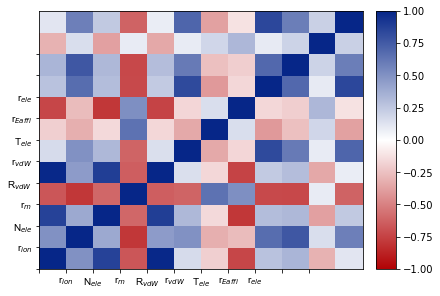

In [86]:
N = 256
vals = np.ones((N, 4))
vals1 = np.ones((N, 4))
vals[:, 0] = np.linspace(178/256, 1, N)
vals[:, 1] = np.linspace(2/256, 1, N)
vals[:, 2] = np.linspace(4/256, 1, N)
vals1[:, 0] = np.linspace(1 ,6/256, N)
vals1[:, 1] = np.linspace(1,38/256,  N)
vals1[:, 2] = np.linspace(1,137/256,  N)




newcolors = np.vstack((vals,
                       vals1))
newcmp = ListedColormap(newcolors, name='OrangeBlue')
plot_examples([newcmp])

In [88]:
X=dataset[ [  
       'averagecharge','rele','d2','rion' #'L','EQ' ,'TL', 'rvdw','rele','rion','rVm', 'Eaffi','Tele','ktherm'
            ]]

#X=dataset.iloc[:,1:21]  # Features
y=dataset[ 'Tar'] # Features
sc = StandardScaler() 
  
X_form = sc.fit_transform(X) 

In [89]:
X1 = pd.DataFrame( X_train)
X1.to_csv('oer/xform.csv',header=True)
y1 = pd.DataFrame( y_train)
y1.to_csv('oer/ytar.csv',header=True)

In [90]:
n_estimators = np.arange(50, 200, 50)
gbrs = [GBR(n_estimators=n_estimator) for n_estimator in n_estimators]
residuals = {}
for i, gbr in enumerate(gbrs):
    gbr.fit(X_train, y_train)
    residuals[gbr.n_estimators] = y_train - gbr.predict(X_train)


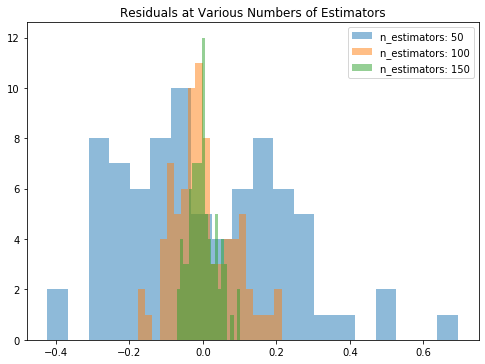

In [91]:
f, ax = plt.subplots(figsize=(7, 5))
f.tight_layout()
#colors = {100:'r', 200:'g', 300:'b'}
for k, v in residuals.items():
    ax.hist(v,bins=20,label='n_estimators: %d' % k, alpha=.5);
ax.set_title("Residuals at Various Numbers of Estimators")
ax.legend(loc='best')


Iteration: 45 Train mse: 0.013245336850656642 Test mse: 0.4478723769171043
Training Score:0.985411
Testing Score:0.154305


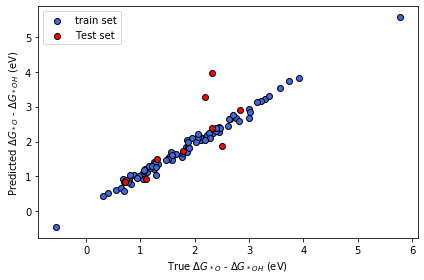

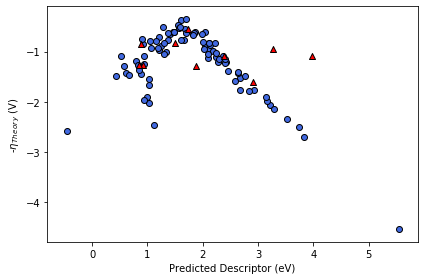

In [92]:

gbr = GBR(n_estimators=1000, max_depth= 4, 
         learning_rate= 0.01, loss='ls')


for iter in range(45,46):
    X_train, X_test, y_train, y_test = train_test_split(X_form, y, test_size=0.10,random_state=iter)     
    #print(y_test)
    gbr.fit(X_train, y_train)
    y_train_predicted = gbr.predict(X_train)
    y_test_predicted = gbr.predict(X_test)
      #ypredicted=rf.predict(X_form)
      #X5 = pd.DataFrame( ypredicted)
      #X5.to_csv('oer/predicted.csv',header=True)    
    y_predicted=gbr.predict(X_form)

    mse_train = mean_squared_error(y_train, y_train_predicted)
    mse_test = mean_squared_error(y_test, y_test_predicted)
    print("Iteration: {} Train mse: {} Test mse: {}".format(iter, mse_train, mse_test))
    print("Training Score:%f"%gbr.score(X_train,y_train))
    print("Testing Score:%f"%gbr.score(X_test,y_test))
    gbr.n_estimators += 500


    plt.scatter(y_train, y_train_predicted,label="train set",color='royalblue',edgecolor='k')
    plt.scatter(y_test, y_test_predicted,label="Test set",color='r',edgecolor='k')

    plt.xlabel('True '+r'Δ'+'$\itG$'+'$_*$'+'$_O$'+' -'+' Δ'+'$\itG$'+'$_*$'+'$_O$'+'$_H$'+' (eV)')
    plt.ylabel('Predicted '+r'Δ'+'$\itG$'+'$_*$'+'$_O$'+' -'+' Δ'+'$\itG$'+'$_*$'+'$_O$'+'$_H$'+' (eV)')
      #plt.title('ramdom forest training')
    plt.legend()
    plt.tight_layout()
    plt.savefig('./trainingoer.jpg',dpi=600)
    plt.show()
      #print(y_train.index)
    y_draw=dataset['OverPotential']
      #print(y_draw)
    k=0
    for i in y_train.index:
            #print(i)
        plt.scatter(y_train_predicted[k], y_draw.iloc[i],label="train set",color='royalblue',edgecolor='k')
        k+=1
    k=0
    for i in y_test.index:
            #print(i)
        plt.scatter(y_test_predicted[k], y_draw.iloc[i],label="train set",color='r',edgecolor='k',marker='^')
        k+=1        


    plt.xlabel('Predicted Descriptor (eV)')
    plt.ylabel(r'-'+'$\eta$'+"$_T$"+"$_h$"+"$_e$"+"$_o$"+"$_r$"+"$_y$"+' (V)')

    plt.tight_layout()
    plt.savefig('./preoer.jpg',dpi=600)
    plt.show()



In [93]:
gbr = GBR(n_estimators=200, max_depth=10, 
         learning_rate= 0.01, loss='ls')

score=0.0

for seed in range(1,100):
    cv = KFold(n_splits=10,random_state=seed,shuffle=True)
    itera=0
    for train, test in cv.split(X_form, y):

        X_train, X_test = X_form[list(train)], X_form[list(test)]
        y_train, y_test = y.iloc[list(train)], y.iloc[list(test)]

        gbr.fit(X_train, y_train)





            #joblib.dump(gbr, 'oer/oer_5_fold_4.pkl')

            #print(y_test)
        y_train_predicted = gbr.predict(X_train)
        y_test_predicted = gbr.predict(X_test)

              #ypredicted=rf.predict(X_form)
              #X5 = pd.DataFrame( ypredicted)
              #X5.to_csv('oer/predicted.csv',header=True)    

            #print(X_form)
            #print(X_train,X_test)
        mse_train = mean_squared_error(y_train, y_train_predicted)
        mse_test = mean_squared_error(y_test, y_test_predicted)
        print("Iteration: {} Train mse: {} Test mse: {}".format(itera, mse_train, mse_test))
        print("Training Score:%f"%gbr.score(X_train,y_train))
        print("Testing Score:%f"%gbr.score(X_test,y_test))



        if gbr.score(X_test,y_test)>=score:
            X_train_t= X_train
            X_test_t= X_test
            y_train_t= y_train
            y_test_t= y_test
            y_predicted=gbr.predict(X_form)
            score=gbr.score(X_test,y_test)
            seednumber=seed
            joblib.dump(gbr, 'oer/'+'10_fold'+str(seed)+'.pkl')
            #gbr.n_estimators += 500


        #plt.scatter(y_train, y_train_predicted,label="train set",color='royalblue',edgecolor='k')
        #plt.scatter(y_test, y_test_predicted,label="Test set",color='r',edgecolor='k')
        #    
        ##plt.scatter(y, y_predicted,label="Test set",color='b',edgecolor='k',alpha=0.5)
        #    
        #    
        #plt.xlabel('True '+r'Δ'+'$\itG$'+'$_*$'+'$_O$'+' -'+' Δ'+'$\itG$'+'$_*$'+'$_O$'+'$_H$'+' (eV)')
        #plt.ylabel('Predicted '+r'Δ'+'$\itG$'+'$_*$'+'$_O$'+' -'+' Δ'+'$\itG$'+'$_*$'+'$_O$'+'$_H$'+' (eV)')
        #      #plt.title('ramdom forest training')
        #plt.legend()
        #plt.tight_layout()
        #plt.savefig('./trainingoer.jpg',dpi=600)
        #plt.show()
        #      #print(y_train.index)
        #y_draw=dataset['OverPotential']
        #      #print(y_draw)
        #k=0
        #for i in y_train.index:
        #            #print(i)
        #    plt.scatter(y_train_predicted[k], y_draw.iloc[i],label="train set",color='royalblue',edgecolor='k')
        #    k+=1
        #k=0
        #for i in y_test.index:
        #            #print(i)
        #    plt.scatter(y_test_predicted[k], y_draw.iloc[i],label="train set",color='r',edgecolor='k',marker='^')
        #    k+=1        
    ##
    ##
        #plt.xlabel('Predicted Descriptor (eV)')
        #plt.ylabel(r'-'+'$\eta$'+"$_T$"+"$_h$"+"$_e$"+"$_o$"+"$_r$"+"$_y$"+' (V)')
    ##
        #plt.tight_layout()
        #plt.savefig('./preoer.jpg',dpi=600)
        #plt.show()
        itera+=1
print(score,seednumber)

Iteration: 0 Train mse: 0.01920454627529274 Test mse: 0.5117924424420198
Training Score:0.978408
Testing Score:-0.278535
Iteration: 1 Train mse: 0.01709317323481028 Test mse: 1.1782881326410772
Training Score:0.981505
Testing Score:-4.534847
Iteration: 2 Train mse: 0.015913156166606872 Test mse: 0.13792166526317468
Training Score:0.981417
Testing Score:0.844586
Iteration: 3 Train mse: 0.015458669226257535 Test mse: 1.0334222853988582
Training Score:0.981912
Testing Score:-0.065415
Iteration: 4 Train mse: 0.016215734036408698 Test mse: 1.497502108400453
Training Score:0.982017
Testing Score:-1.588414
Iteration: 5 Train mse: 0.013108839252767115 Test mse: 2.300162090419417
Training Score:0.981781
Testing Score:-0.068717
Iteration: 6 Train mse: 0.016366942987681658 Test mse: 0.2314951276933602
Training Score:0.981834
Testing Score:0.589684
Iteration: 7 Train mse: 0.01676120843953229 Test mse: 1.2960597950953423
Training Score:0.981046
Testing Score:-0.745493
Iteration: 8 Train mse: 0.0169

Testing Score:-3.147871
Iteration: 1 Train mse: 0.012368119466045394 Test mse: 2.569421383014279
Training Score:0.981953
Testing Score:-0.482037
Iteration: 2 Train mse: 0.01607747850555445 Test mse: 0.8460558692228783
Training Score:0.981351
Testing Score:-0.076017
Iteration: 3 Train mse: 0.016015026480160222 Test mse: 0.5373076960755692
Training Score:0.981817
Testing Score:0.286112
Iteration: 4 Train mse: 0.017105331493667997 Test mse: 0.5657502451897332
Training Score:0.981145
Testing Score:-3.181236
Iteration: 5 Train mse: 0.018421248564039025 Test mse: 0.17419341961928533
Training Score:0.979358
Testing Score:0.709652
Iteration: 6 Train mse: 0.01637867619985898 Test mse: 0.43175484899531336
Training Score:0.981977
Testing Score:0.137609
Iteration: 7 Train mse: 0.01668445895489783 Test mse: 0.6304326694685536
Training Score:0.980834
Testing Score:0.240628
Iteration: 8 Train mse: 0.01863417437815035 Test mse: 0.7656291558998377
Training Score:0.978525
Testing Score:0.128530
Iteratio

Iteration: 9 Train mse: 0.015270371809875666 Test mse: 0.9487517072736862
Training Score:0.981940
Testing Score:0.103501
Iteration: 0 Train mse: 0.01625221788190658 Test mse: 0.7468463741424796
Training Score:0.981832
Testing Score:-0.213982
Iteration: 1 Train mse: 0.017386742252645422 Test mse: 1.2942385344551701
Training Score:0.979589
Testing Score:-0.289355
Iteration: 2 Train mse: 0.017041282113393754 Test mse: 2.4799955411301204
Training Score:0.981412
Testing Score:-5.426904
Iteration: 3 Train mse: 0.01600562541312803 Test mse: 1.574174937221306
Training Score:0.977778
Testing Score:0.290451
Iteration: 4 Train mse: 0.01706713534839228 Test mse: 0.6223347446603262
Training Score:0.981152
Testing Score:-0.526813
Iteration: 5 Train mse: 0.016147803090943585 Test mse: 0.12466202678845792
Training Score:0.981264
Testing Score:0.785020
Iteration: 6 Train mse: 0.016255698591100393 Test mse: 0.5499843998934987
Training Score:0.981962
Testing Score:-0.095761
Iteration: 7 Train mse: 0.0148

Iteration: 9 Train mse: 0.016461312870580336 Test mse: 0.8283525283982913
Training Score:0.981484
Testing Score:-0.210597
Iteration: 0 Train mse: 0.01613493618374038 Test mse: 0.6510608613041474
Training Score:0.981989
Testing Score:-0.027251
Iteration: 1 Train mse: 0.015868299064805087 Test mse: 0.7010130524925545
Training Score:0.981617
Testing Score:0.201604
Iteration: 2 Train mse: 0.01769221376328664 Test mse: 0.24944363920228235
Training Score:0.980834
Testing Score:0.366261
Iteration: 3 Train mse: 0.01602980055358695 Test mse: 0.16031465921410853
Training Score:0.981538
Testing Score:0.800720
Iteration: 4 Train mse: 0.01356548981257272 Test mse: 1.6928546649746732
Training Score:0.981944
Testing Score:-0.046504
Iteration: 5 Train mse: 0.017077744553150132 Test mse: 1.0871642355276587
Training Score:0.980569
Testing Score:-0.398378
Iteration: 6 Train mse: 0.01785373830926936 Test mse: 1.4460870548813285
Training Score:0.980519
Testing Score:-2.496562
Iteration: 7 Train mse: 0.0185

Training Score:0.981556
Testing Score:-0.326888
Iteration: 7 Train mse: 0.018056552342332992 Test mse: 0.48201933198671726
Training Score:0.980359
Testing Score:-0.143117
Iteration: 8 Train mse: 0.013970435262809808 Test mse: 2.026654646978804
Training Score:0.980514
Testing Score:0.093576
Iteration: 9 Train mse: 0.01862068182473621 Test mse: 0.31561615247047936
Training Score:0.979937
Testing Score:0.029592
Iteration: 0 Train mse: 0.01632295141901485 Test mse: 0.2687631200870146
Training Score:0.981904
Testing Score:0.537176
Iteration: 1 Train mse: 0.015928142328895313 Test mse: 0.5747578813505275
Training Score:0.981970
Testing Score:0.231122
Iteration: 2 Train mse: 0.019108782158338156 Test mse: 1.4434972995373203
Training Score:0.978460
Testing Score:-1.031917
Iteration: 3 Train mse: 0.016359194012679983 Test mse: 1.0371595294460756
Training Score:0.981081
Testing Score:-0.208362
Iteration: 4 Train mse: 0.01599045501727705 Test mse: 1.956675908339685
Training Score:0.981879
Testing

Iteration: 6 Train mse: 0.015938521717697204 Test mse: 0.4900953393737761
Training Score:0.982036
Testing Score:0.304640
Iteration: 7 Train mse: 0.01579089748179919 Test mse: 2.383640448993984
Training Score:0.982040
Testing Score:-3.039424
Iteration: 8 Train mse: 0.015323632333134794 Test mse: 1.9556600098899328
Training Score:0.981327
Testing Score:-0.492956
Iteration: 9 Train mse: 0.01645894891415779 Test mse: 1.584537166050283
Training Score:0.981525
Testing Score:-1.317884
Iteration: 0 Train mse: 0.016020022892907257 Test mse: 0.732647875204186
Training Score:0.981313
Testing Score:0.079270
Iteration: 1 Train mse: 0.016624063130723725 Test mse: 1.1822185551030877
Training Score:0.981069
Testing Score:-0.556514
Iteration: 2 Train mse: 0.01559088611218991 Test mse: 1.640963723849551
Training Score:0.981841
Testing Score:-2.240512
Iteration: 3 Train mse: 0.01861392281191125 Test mse: 1.5851682462205914
Training Score:0.979292
Testing Score:-1.710690
Iteration: 4 Train mse: 0.01369515

Iteration: 6 Train mse: 0.013719242051802779 Test mse: 2.285460881343382
Training Score:0.980766
Testing Score:-0.247705
Iteration: 7 Train mse: 0.01559136712152411 Test mse: 0.8282185727367306
Training Score:0.981686
Testing Score:0.152391
Iteration: 8 Train mse: 0.01821597463360655 Test mse: 1.330580780888082
Training Score:0.980265
Testing Score:-2.372913
Iteration: 9 Train mse: 0.01889051540771206 Test mse: 0.4874907475501799
Training Score:0.980077
Testing Score:-1.930316
Iteration: 0 Train mse: 0.016259911076508853 Test mse: 0.4953077974894701
Training Score:0.981467
Testing Score:0.354854
Iteration: 1 Train mse: 0.017858256058262186 Test mse: 0.6796359605754801
Training Score:0.979732
Testing Score:0.021562
Iteration: 2 Train mse: 0.017352985059624754 Test mse: 1.1784739295529363
Training Score:0.980592
Testing Score:-0.804096
Iteration: 3 Train mse: 0.01632091526952944 Test mse: 0.6798110064080849
Training Score:0.981839
Testing Score:-0.402204
Iteration: 4 Train mse: 0.0169958

Training Score:0.981230
Testing Score:0.221170
Iteration: 4 Train mse: 0.01717121709900501 Test mse: 1.2609585898157873
Training Score:0.981305
Testing Score:-2.169028
Iteration: 5 Train mse: 0.016083850738574653 Test mse: 1.7154583032943784
Training Score:0.980993
Testing Score:-1.409199
Iteration: 6 Train mse: 0.01739444284993912 Test mse: 0.45602763652920714
Training Score:0.981378
Testing Score:-0.549094
Iteration: 7 Train mse: 0.01648784665097773 Test mse: 0.8279292967982265
Training Score:0.981338
Testing Score:-0.105106
Iteration: 8 Train mse: 0.017509710248312063 Test mse: 0.44073997703028445
Training Score:0.981053
Testing Score:-0.202802
Iteration: 9 Train mse: 0.015517806338842016 Test mse: 0.9795639833565882
Training Score:0.981501
Testing Score:0.031241
Iteration: 0 Train mse: 0.017546741228106205 Test mse: 0.4776564936512625
Training Score:0.981348
Testing Score:-1.983200
Iteration: 1 Train mse: 0.016563691691424513 Test mse: 1.4793200194085099
Training Score:0.980997
Tes

Iteration: 5 Train mse: 0.017040132256019556 Test mse: 0.7393822008576837
Training Score:0.981327
Testing Score:-0.515809
Iteration: 6 Train mse: 0.01792130460204751 Test mse: 0.4324821094880152
Training Score:0.979256
Testing Score:0.532961
Iteration: 7 Train mse: 0.016547800945873492 Test mse: 0.4265684346205313
Training Score:0.980359
Testing Score:0.602867
Iteration: 8 Train mse: 0.013286772903160611 Test mse: 1.866183693599874
Training Score:0.981765
Testing Score:-0.072952
Iteration: 9 Train mse: 0.016392495897747016 Test mse: 1.4483785256067232
Training Score:0.981648
Testing Score:-1.244273
Iteration: 0 Train mse: 0.016283733889818346 Test mse: 1.0237746581601728
Training Score:0.981699
Testing Score:-0.749032
Iteration: 1 Train mse: 0.01641186972689664 Test mse: 0.6287606271605086
Training Score:0.980872
Testing Score:0.242926
Iteration: 2 Train mse: 0.016272465904766588 Test mse: 0.571829755338807
Training Score:0.981059
Testing Score:0.400549
Iteration: 3 Train mse: 0.015470

Iteration: 4 Train mse: 0.014546869571392082 Test mse: 0.892619142896676
Training Score:0.981888
Testing Score:0.391569
Iteration: 5 Train mse: 0.017521461001074688 Test mse: 0.49612092253903484
Training Score:0.980588
Testing Score:0.116593
Iteration: 6 Train mse: 0.017047327547702454 Test mse: 0.4028090680898083
Training Score:0.981409
Testing Score:0.071304
Iteration: 7 Train mse: 0.016123397747851938 Test mse: 0.10077032167296107
Training Score:0.982022
Testing Score:0.840026
Iteration: 8 Train mse: 0.01573604920529731 Test mse: 0.41611022718738405
Training Score:0.981982
Testing Score:0.424227
Iteration: 9 Train mse: 0.01640565954177686 Test mse: 0.7020996502727523
Training Score:0.981915
Testing Score:-0.393374
Iteration: 0 Train mse: 0.01713666870104597 Test mse: 0.44038061015883534
Training Score:0.981263
Testing Score:0.043389
Iteration: 1 Train mse: 0.01773534000859483 Test mse: 1.6906915671300644
Training Score:0.980479
Testing Score:-2.231486
Iteration: 2 Train mse: 0.01563

Iteration: 3 Train mse: 0.015994842650554925 Test mse: 0.5430717045079436
Training Score:0.981607
Testing Score:0.318409
Iteration: 4 Train mse: 0.017053919908005217 Test mse: 0.1753842495731574
Training Score:0.981206
Testing Score:0.670401
Iteration: 5 Train mse: 0.016206721161368783 Test mse: 1.338567500353613
Training Score:0.982044
Testing Score:-2.765615
Iteration: 6 Train mse: 0.01763882486396537 Test mse: 0.3887892178715498
Training Score:0.979982
Testing Score:0.419663
Iteration: 7 Train mse: 0.015628572148178692 Test mse: 2.6322687191170395
Training Score:0.981709
Testing Score:-1.844897
Iteration: 8 Train mse: 0.01635755760132371 Test mse: 0.46917990106442015
Training Score:0.981850
Testing Score:0.162525
Iteration: 9 Train mse: 0.017220377632655763 Test mse: 1.0083480310192898
Training Score:0.981398
Testing Score:-2.350495
Iteration: 0 Train mse: 0.015041962832416619 Test mse: 0.6477580734996432
Training Score:0.981419
Testing Score:0.532941
Iteration: 1 Train mse: 0.01889

Iteration: 1 Train mse: 0.012790095136214727 Test mse: 1.9790181401284506
Training Score:0.981943
Testing Score:-0.398406
Iteration: 2 Train mse: 0.018409265360871795 Test mse: 1.448320472818029
Training Score:0.980467
Testing Score:-5.679862
Iteration: 3 Train mse: 0.014717619779213886 Test mse: 0.5386464520757813
Training Score:0.981938
Testing Score:0.604935
Iteration: 4 Train mse: 0.016807025563270826 Test mse: 0.8126194007002155
Training Score:0.981063
Testing Score:-0.166341
Iteration: 5 Train mse: 0.016079711225507456 Test mse: 2.3637463670364034
Training Score:0.982026
Testing Score:-4.456834
Iteration: 6 Train mse: 0.01792654959266705 Test mse: 0.4871673958560378
Training Score:0.979956
Testing Score:-0.552165
Iteration: 7 Train mse: 0.01617580934350539 Test mse: 0.42093430527047354
Training Score:0.981563
Testing Score:0.378687
Iteration: 8 Train mse: 0.018534730548816845 Test mse: 0.3445811570600864
Training Score:0.979449
Testing Score:0.320716
Iteration: 9 Train mse: 0.016

Iteration: 9 Train mse: 0.017574995713560485 Test mse: 1.0233874929853048
Training Score:0.980618
Testing Score:-0.898448
Iteration: 0 Train mse: 0.016304771919772074 Test mse: 0.9789250270700152
Training Score:0.981675
Testing Score:-0.922766
Iteration: 1 Train mse: 0.015079065485594994 Test mse: 0.9005006488577528
Training Score:0.981828
Testing Score:0.224814
Iteration: 2 Train mse: 0.01748002170233671 Test mse: 0.13641647964826975
Training Score:0.980850
Testing Score:0.605087
Iteration: 3 Train mse: 0.01641576212767484 Test mse: 1.6420981999020992
Training Score:0.980437
Testing Score:-0.489313
Iteration: 4 Train mse: 0.017983579444594496 Test mse: 0.493268037620206
Training Score:0.979413
Testing Score:0.405920
Iteration: 5 Train mse: 0.013488993505065347 Test mse: 1.6555517732673048
Training Score:0.981967
Testing Score:0.075729
Iteration: 6 Train mse: 0.0161052106509454 Test mse: 0.8719065096229148
Training Score:0.981986
Testing Score:-0.339371
Iteration: 7 Train mse: 0.017470

Iteration: 8 Train mse: 0.018745848762541078 Test mse: 0.5571247370034655
Training Score:0.979919
Testing Score:-1.001080
Iteration: 9 Train mse: 0.021209992223924744 Test mse: 0.481844823582868
Training Score:0.976711
Testing Score:-0.131855
Iteration: 0 Train mse: 0.015753158196276845 Test mse: 1.8959555172565312
Training Score:0.981593
Testing Score:-1.472581
Iteration: 1 Train mse: 0.0159530370133951 Test mse: 1.9559132174936855
Training Score:0.982040
Testing Score:-4.891136
Iteration: 2 Train mse: 0.016563941431144622 Test mse: 0.5321046494468642
Training Score:0.981464
Testing Score:0.183343
Iteration: 3 Train mse: 0.016255895018919077 Test mse: 0.459238760120021
Training Score:0.981999
Testing Score:0.172485
Iteration: 4 Train mse: 0.016660388789436882 Test mse: 0.9157620513285998
Training Score:0.980992
Testing Score:-0.695986
Iteration: 5 Train mse: 0.016871198801297935 Test mse: 0.1766213320426828
Training Score:0.981420
Testing Score:0.666105
Iteration: 6 Train mse: 0.01756

Training Score:0.982033
Testing Score:0.443108
Iteration: 8 Train mse: 0.016058826964743596 Test mse: 0.4164429133570997
Training Score:0.981417
Testing Score:0.474948
Iteration: 9 Train mse: 0.017529794320571793 Test mse: 0.8063027175558213
Training Score:0.979837
Testing Score:0.078151
Iteration: 0 Train mse: 0.01597842269098974 Test mse: 0.8244636870493863
Training Score:0.981949
Testing Score:-0.134417
Iteration: 1 Train mse: 0.01576163161453209 Test mse: 0.37552406611214967
Training Score:0.981697
Testing Score:0.567128
Iteration: 2 Train mse: 0.01866279671223452 Test mse: 0.6682598831310531
Training Score:0.979191
Testing Score:-0.125147
Iteration: 3 Train mse: 0.01816114754842075 Test mse: 0.6116949953232822
Training Score:0.980758
Testing Score:-2.145277
Iteration: 4 Train mse: 0.015466222079634015 Test mse: 0.706891662911035
Training Score:0.981439
Testing Score:0.308849
Iteration: 5 Train mse: 0.01724866677879119 Test mse: 0.1564676184258587
Training Score:0.980951
Testing Sc

Iteration: 0 Train mse: 9.99770262530006e-08 Test mse: 0.9964805766059044
Training Score:1.000000
Testing Score:-0.648976


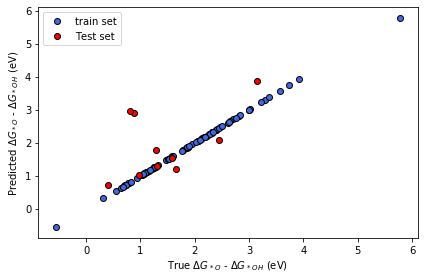

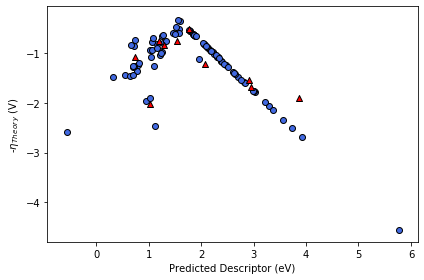

Iteration: 1 Train mse: 9.994810327246176e-08 Test mse: 2.1188143485852673
Training Score:1.000000
Testing Score:-0.125506


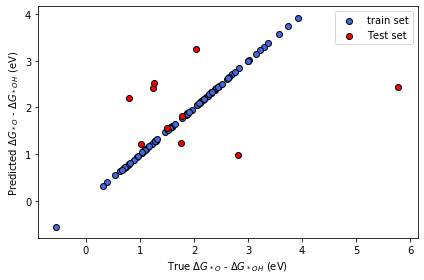

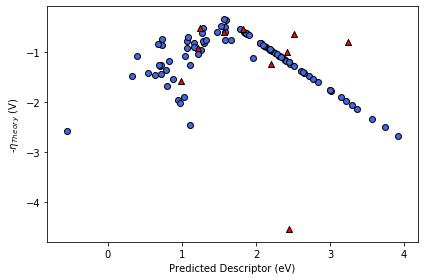

Iteration: 2 Train mse: 9.999397536274583e-08 Test mse: 0.0584576749472421
Training Score:1.000000
Testing Score:0.940499


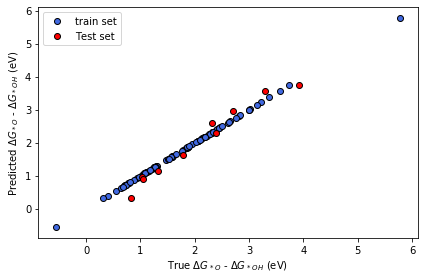

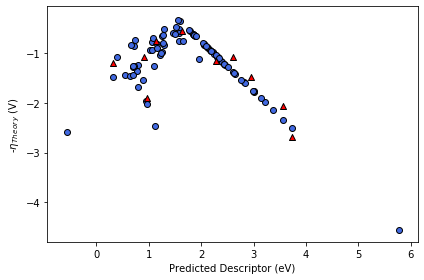

Iteration: 3 Train mse: 9.995238504202416e-08 Test mse: 1.070389799065602
Training Score:1.000000
Testing Score:-1.031800


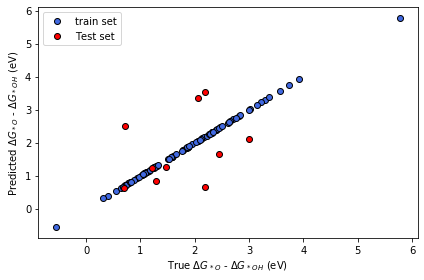

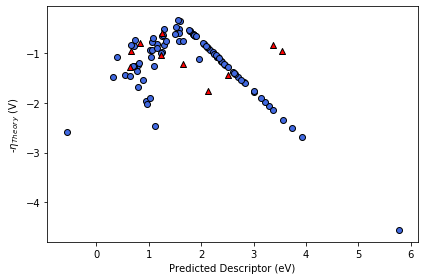

Iteration: 4 Train mse: 9.997995904833678e-08 Test mse: 0.7908222687655561
Training Score:1.000000
Testing Score:-0.011315


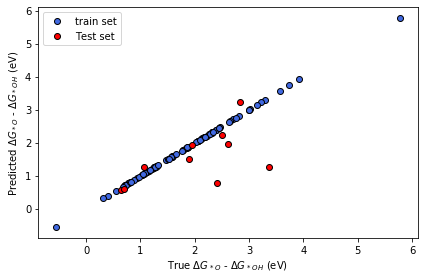

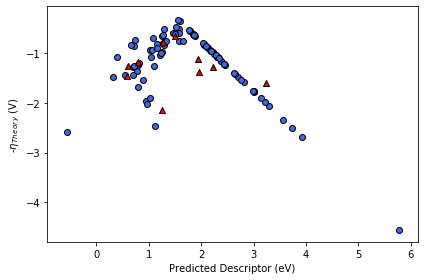

Iteration: 5 Train mse: 9.966857969486279e-08 Test mse: 0.5167681256388293
Training Score:1.000000
Testing Score:0.414495


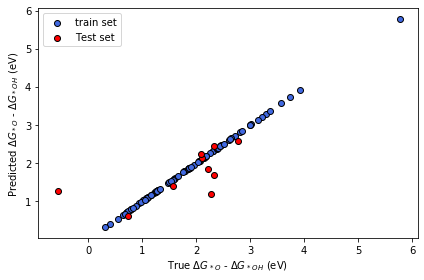

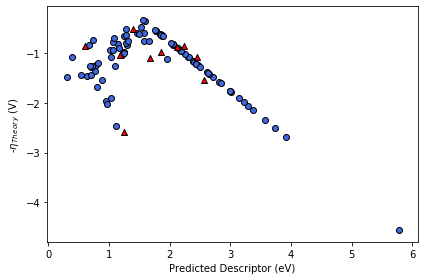

Iteration: 6 Train mse: 9.99597241528243e-08 Test mse: 0.9045032659582242
Training Score:1.000000
Testing Score:-0.126053


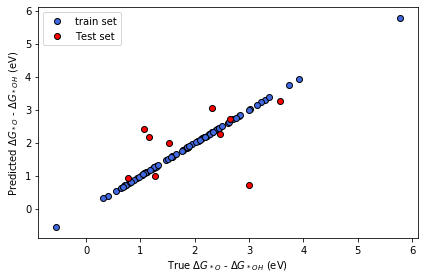

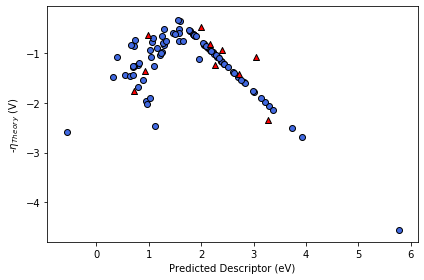

Iteration: 7 Train mse: 9.996786788898393e-08 Test mse: 0.6595530372546655
Training Score:1.000000
Testing Score:-0.111898


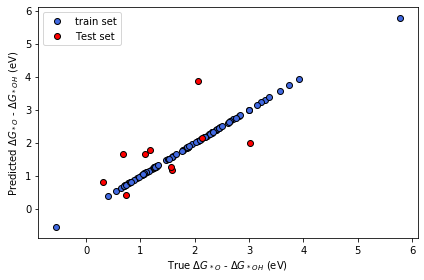

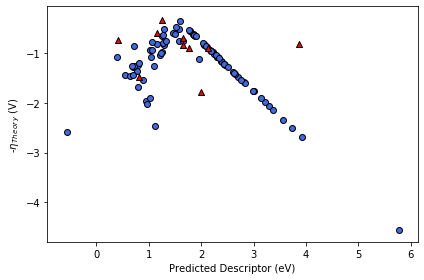

Iteration: 8 Train mse: 9.964449142961045e-08 Test mse: 0.6773384481882808
Training Score:1.000000
Testing Score:0.270317


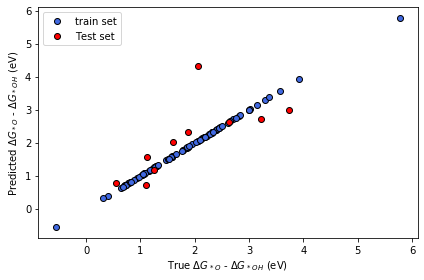

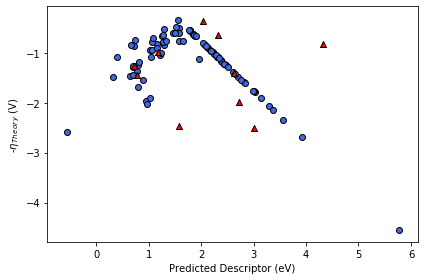

Iteration: 9 Train mse: 9.99831657265994e-08 Test mse: 2.2832365206645173
Training Score:1.000000
Testing Score:-7.800605


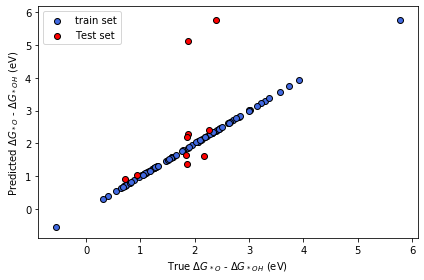

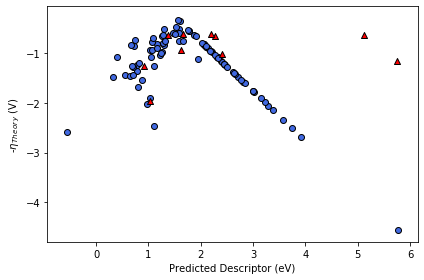

0.9404990806936598 80


In [96]:

gbr = GBR(n_estimators=1000, max_depth=11, 
         learning_rate= 0.01, loss='ls')

score=0.0

for seed in range(seednumber,seednumber+1):
    cv = KFold(n_splits=10,random_state=seed,shuffle=True)
    itera=0
    for train, test in cv.split(X_form, y):

        X_train, X_test = X_form[list(train)], X_form[list(test)]
        y_train, y_test = y.iloc[list(train)], y.iloc[list(test)]

        gbr.fit(X_train, y_train)





            #joblib.dump(gbr, 'oer/oer_5_fold_4.pkl')

            #print(y_test)
        y_train_predicted = gbr.predict(X_train)
        y_test_predicted = gbr.predict(X_test)

              #ypredicted=rf.predict(X_form)
              #X5 = pd.DataFrame( ypredicted)
              #X5.to_csv('oer/predicted.csv',header=True)    

            #print(X_form)
            #print(X_train,X_test)
        mse_train = mean_squared_error(y_train, y_train_predicted)
        mse_test = mean_squared_error(y_test, y_test_predicted)
        print("Iteration: {} Train mse: {} Test mse: {}".format(itera, mse_train, mse_test))
        print("Training Score:%f"%gbr.score(X_train,y_train))
        print("Testing Score:%f"%gbr.score(X_test,y_test))



        if gbr.score(X_test,y_test)>=score:
            X_train_t= X_train
            X_test_t= X_test
            y_train_t= y_train
            y_test_t= y_test
            y_predicted=gbr.predict(X_form)
            score=gbr.score(X_test,y_test)
            seednumber=seed
            joblib.dump(gbr, 'oer/'+'10_fold'+str(seed)+'.pkl')
            #gbr.n_estimators += 500


        plt.scatter(y_train, y_train_predicted,label="train set",color='royalblue',edgecolor='k')
        plt.scatter(y_test, y_test_predicted,label="Test set",color='r',edgecolor='k')
            
        #plt.scatter(y, y_predicted,label="Test set",color='b',edgecolor='k',alpha=0.5)
            
            
        plt.xlabel('True '+r'Δ'+'$\itG$'+'$_*$'+'$_O$'+' -'+' Δ'+'$\itG$'+'$_*$'+'$_O$'+'$_H$'+' (eV)')
        plt.ylabel('Predicted '+r'Δ'+'$\itG$'+'$_*$'+'$_O$'+' -'+' Δ'+'$\itG$'+'$_*$'+'$_O$'+'$_H$'+' (eV)')
              #plt.title('ramdom forest training')
        plt.legend()
        plt.tight_layout()
        plt.savefig('./trainingoer.jpg',dpi=600)
        plt.show()
              #print(y_train.index)
        y_draw=dataset['OverPotential']
              #print(y_draw)
        k=0
        for i in y_train.index:
                    #print(i)
            plt.scatter(y_train_predicted[k], y_draw.iloc[i],label="train set",color='royalblue',edgecolor='k')
            k+=1
        k=0
        for i in y_test.index:
                    #print(i)
            plt.scatter(y_test_predicted[k], y_draw.iloc[i],label="train set",color='r',edgecolor='k',marker='^')
            k+=1        
    #
    #
        plt.xlabel('Predicted Descriptor (eV)')
        plt.ylabel(r'-'+'$\eta$'+"$_T$"+"$_h$"+"$_e$"+"$_o$"+"$_r$"+"$_y$"+' (V)')
    #
        plt.tight_layout()
        plt.savefig('./preoer.jpg',dpi=600)
        plt.show()
        itera+=1
print(score,seednumber)

(100, 1)
R^2:  0.9936458459721843 mse:  0.005845857489302037


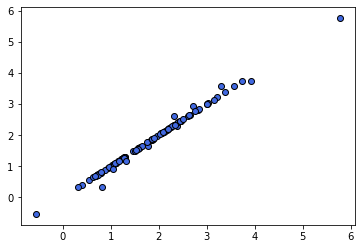

In [97]:
plt.scatter(y, y_predicted,marker='o',color='royalblue',edgecolor='k')


from sklearn import linear_model
clf = linear_model.LinearRegression()
xset=y.values.reshape(-1,1)
print(xset.shape)

clf.fit(xset,y_predicted)
R=clf.score(xset,y_predicted)
mse = mean_squared_error(y, y_predicted)
y_pred=clf.predict(xset)
print('R^2: ',R,'mse: ',mse)

X_line=np.array([-0.6,5.8]).reshape(-1,1)

Y_line=clf.predict(X_line)



In [98]:
gbr.fit(X_form, y)
feature_imp = pd.Series(gbr.feature_importances_,index=X.columns[0:25]).sort_values(ascending=False)
feature_imp

averagecharge    0.534109
rele             0.232467
d2               0.168126
rion             0.065299
dtype: float64

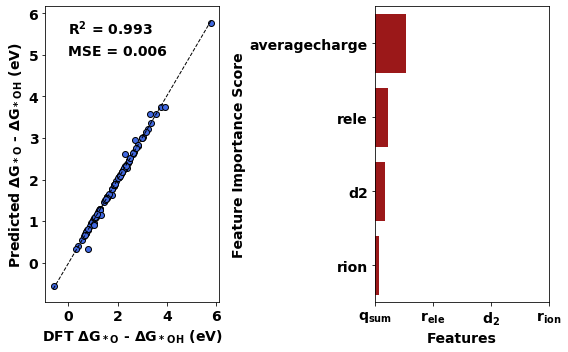

In [100]:
fig = plt.figure(figsize=(8, 5))
ax2 = plt.subplot(1,2,2)

plt.scatter(xset, y_predicted,marker='o',color='royalblue',edgecolor='k')
plt.plot(X_line, Y_line,'--',color='k',linewidth=1)



plt.xlabel('DFT '+r'Δ'+r'$\it\bfG$'+r'$\bf_*$'+r'$\bf_O$'+' -'+' Δ'+r'$\it\bfG$'+r'$\bf_*$'+r'$\bf_O$'+r'$\bf_H$'+' (eV)',fontweight='bold',fontsize=14)
#plt.ylabel(r"-$\eta$ theory (v)")

plt.ylabel('Predicted '+r'Δ'+r'$\it\bfG$'+r'$\bf_*$'+r'$\bf_O$'+' -'+' Δ'+r'$\it\bfG$'+r'$\bf_*$'+r'$\bf_O$'+r'$\bf_H$'+' (eV)',fontweight='bold',fontsize=14)

plt.text(0.0,5.5,'R'+r'$\bf^2$'+' = 0.993',fontweight='bold',fontsize=14)
plt.text(0.0,5.0,"MSE"+' = 0.006',fontweight='bold',fontsize=14)
#plt.tick_params(labelsize=14)

plt.xticks( size =14,fontweight='bold')
plt.yticks( size =14,fontweight='bold')


y=np.array([1,2,3,4])
x=feature_imp

ax2 = plt.subplot(1,2,1)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index,color=(178/256.0,2/256.0,4/256.0))
#b1 = plt.bar(feature_imp.index,x, color=(92/256.0,92/256.0,92/256.0))
#plt.barh
# Add labels to your graph
plt.ylabel('Feature Importance Score',fontsize=14,fontweight = 'bold')
plt.xlabel('Features',fontsize=14,fontweight = 'bold')


ax = plt.gca()
ax.set_xticks(np.linspace(0,3,4))    
ax.set_xticklabels([r'q$\bf_{sum}$',r'r$\bf_{ele}$',r'd$\bf_{2}$',r'r$\bf_{ion}$'],fontweight = 'bold',fontsize=14)

plt.xticks( size =14,fontweight='bold')
plt.yticks( size =14,fontweight='bold')




#plt.title('ramdom forest training')
plt.tight_layout()
plt.savefig('oer/output/predictedooh.jpg',dpi=600)
plt.show()

In [ ]:
plt.scatter(xset, y_predicted,marker='o',color=(6/256.0,38/256.0,137/256.0))
plt.plot(xset, y_pred,color=(178/256.0,2/256.0,4/256.0),linewidth=1.5)
plt.xlabel('DFT '+r'Δ'+r'$\itG$'+r'$_{*O}$'+' -'+' Δ'+r'$\itG$'+r'$_{*OH}$'+' (eV)')
#plt.ylabel(r"-$\eta$ theory (v)")

plt.ylabel('Predicted '+r'Δ'+r'$\itG$'+r'$_{*O}$'+' -'+' Δ'+r'$\itG$'+r'$_{*OH}$'+' (eV)')
plt.legend(frameon=False)
plt.text(0.5,3.8,'R'+r'$\bf^2$'+' = 0.997')
plt.text(0.5,3.6,"MSE"+' = 0.002')
#plt.tick_params(labelsize=14)
#ax = plt.gca()
#
#fontweight = 'bold'
#fontproperties = {'weight' : fontweight}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

#plt.title('ramdom forest training')
plt.tight_layout()
plt.savefig('./predictedooh.jpg',dpi=600)
plt.show()

In [ ]:
plt.scatter( y_predicted,dataset['OverPotential'],marker='o',color=(6/256.0,38/256.0,137/256.0))
#plt.plot(xset, y_pred,color=(178/256.0,2/256.0,4/256.0),linewidth=1.5)
plt.xlabel('Predicted '+r'Δ'+r'$\itG$'+r'$_{*O}$'+' -'+' Δ'+r'$\itG$'+r'$_{*OH}$'+' (eV)')
#plt.ylabel(r"-$\eta$ theory (v)")

plt.ylabel(r"-$\eta$$_{Theory}$"+" (ev)")

#plt.tick_params(labelsize=14)
#ax = plt.gca()
#
#fontweight = 'bold'
#fontproperties = {'weight' : fontweight}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

#plt.title('ramdom forest training')
plt.tight_layout()
plt.savefig('./predictedover.jpg',dpi=600)
plt.show()

In [ ]:
 cv = StratifiedKFold(n_splits=5,random_state=seed)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gbr, X_form, y, cv=10)
print('10折结果为:',scores)
print("Accuracy: " ,scores.mean())


In [ ]:
predicted = cross_val_predict(gbr, X_form, y, cv=5)
fig, ax = plt.subplots()
ax.scatter(y, predicted, c="blue", edgecolors="yellow")
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k', lw=2)
ax.set_xlabel('y')
ax.set_ylabel('prediction')
plt.show()


In [ ]:
X_form = X_form.astype(np.float32)
offset = int(X_form.shape[0] * 0.8)
X_train, y_train = X_form[:offset], y[:offset]
X_test, y_test = X_form[offset:], y[offset:]

MSE: 0.2646
iteration:  5


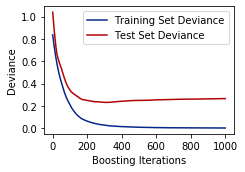

MSE: 0.1540
iteration:  6


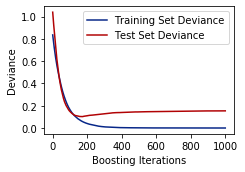

MSE: 0.1107
iteration:  7


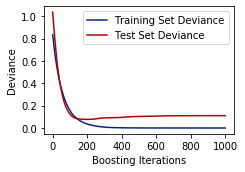

MSE: 0.0981
iteration:  8


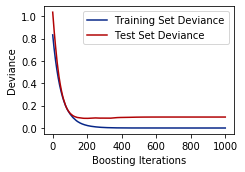

MSE: 0.0919
iteration:  9


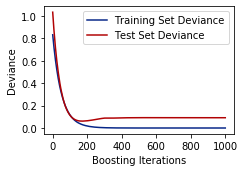

MSE: 0.0953
iteration:  10


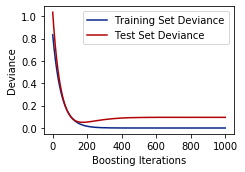

MSE: 0.0622
iteration:  11


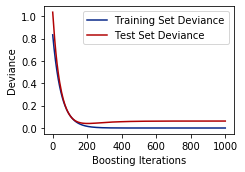

MSE: 0.0905
iteration:  12


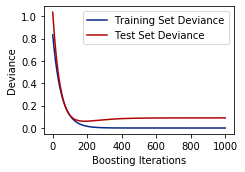

MSE: 0.1132
iteration:  13


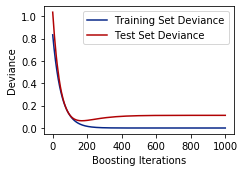

MSE: 0.1165
iteration:  14


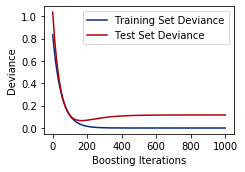

In [95]:
###############################################################################
# Fit regression model
for i in range(5,15):
    params = {'n_estimators': 1000, 'max_depth': i, 
              'learning_rate': 0.01, 'loss': "ls"}
    clf = GBR(**params)
    #print(y_train_t)
    clf.fit(X_train_t, y_train_t)
    mse = mean_squared_error(y_test_t, clf.predict(X_test_t))
    print("MSE: %.4f" % mse)
    print('iteration: ', i)
    ###############################################################################
    # Plot training deviance

    # compute test set deviance
    test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_predict(X_test_t)):
        test_score[i] = clf.loss_(y_test_t, y_pred)

    plt.figure(figsize=(3.5, 2.5))
    #plt.subplot(1, 2, 1)
    #plt.title('Deviance')
    plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_,color=(6/256.0,38/256.0,137/256.0),
             label='Training Set Deviance')
    plt.plot(np.arange(params['n_estimators']) + 1, test_score, color=(178/256.0,2/256.0,4/256.0),
             label='Test Set Deviance')
    plt.legend(loc='upper right')
    plt.xlabel('Boosting Iterations')
    plt.ylabel('Deviance')
    plt.tight_layout()
    plt.savefig('./deviance.jpg',dpi=600)

    plt.show()

In [ ]:
nameset=['rion','Nele','rm','RvdW' ,'rvdW', 'Tele','rEaffi', 'rele']



for name in nameset:
    plt.scatter(dataset[name],dataset['Tar'],color=(230/256.0,125/256.0,49/256.0),marker='*',s=68)
    plt.show()
    
xdata=1/dataset['rion']
plt.scatter(xdata,dataset['Tar'],color='r',marker='*',s=68)